# Simple Linear Regression

Simple Linear Regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables. It's called "simple" because it examines the relationship between two variables only: one independent variable (predictor) and one dependent variable (response).

## Theory

### The Equation
The basic equation of a simple linear regression is:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

where:
- $y$ is the dependent variable (the variable we are trying to predict or explain).
- $x$ is the independent variable (the variable we are using to make predictions).
- $\beta_0$ is the intercept term. It represents the value of \( y \) when \( x \) is 0.
- $\beta_1$ is the slope coefficient. It represents the change in \( y \) for a one-unit change in \( x \).
- $ \epsilon$ is the error term. It accounts for the variability in \( y \) that cannot be explained by the linear relationship with \( x \).

### Assumptions
For simple linear regression to be appropriate, several assumptions must be met:
1. **Linearity**: The relationship between \( x \) and \( y \) should be linear.
2. **Independence**: Observations should be independent of each other.
3. **Homoscedasticity**: The variance of the residual (the error term) should be constant for any value of \( x \).
4. **Normality**: For any fixed value of \( x \), \( y \) should be normally distributed.

### Least Squares Method
The parameters $\beta_0$ and $\beta_1$ are usually estimated using the least squares method. This method minimizes the sum of the squared differences between the observed values and the values predicted by the model. Mathematically, it solves for:

$$ \min_{\beta_0, \beta_1} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2 $$

### Parameter Estimation Formulas
The estimates of $\beta_0$ and $\beta_1$ are given by:

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $$

$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

where $ \bar{x}$ and $\bar{y}$ are the sample means of x and y, respectively.

### Interpretation
- **Intercept ($\beta_0$)**: It is the estimated value of \( y \) when \( x \) is 0.
- **Slope ($\beta_1 $)**: It represents the estimated change in \( y \) for a one-unit increase in \( x \).

## Application and Significance
Simple Linear Regression is widely used in various fields such as economics, biology, engineering, and social sciences. It helps in understanding and predicting the behavior of one variable based on the behavior of another. It's a fundamental tool in data analysis and statistics.


In [2]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Read the data
df = pd.read_csv('Salary_Data.csv')

In [4]:
#Getting an Idea of data
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.shape

(30, 2)

In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [26]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Reshape y_train and y_test into 2D arrays
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Fit the scaler on the reshaped y_train and transform both y_train and y_test
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test= scaler.transform(y_test)


In [21]:
X_test

array([[-1.51917978],
       [-0.5216806 ],
       [ 0.8197838 ],
       [ 0.13185334],
       [-0.48728408],
       [-0.5216806 ]])

In [28]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

34610759.925972424


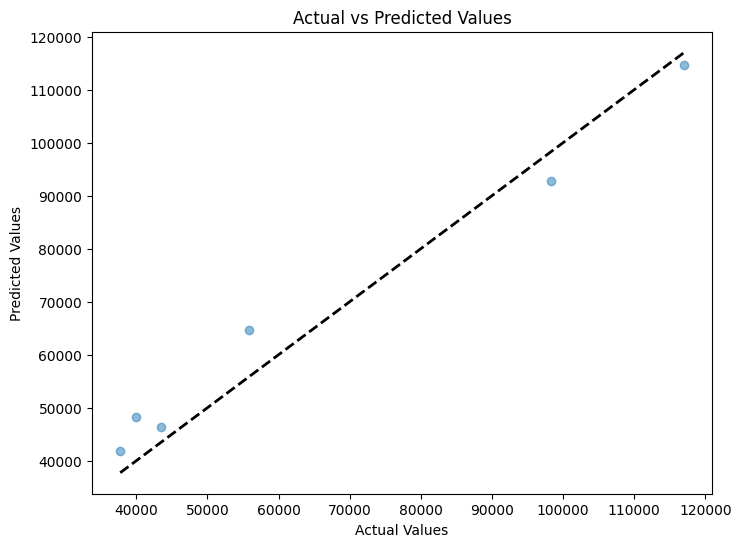

In [31]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

In [33]:
X_test

,YearsExperience
26,9.5
21,7.1
2,1.5
4,2.2
11,4.0
3,2.0


In [35]:
# Retrieve coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)



Coefficients: [9097.48407666]
Intercept: 28209.66122485019


In [43]:
# Assuming 'experience' is your feature name
new_data_dict = {'YearsExperience': [5.0]}  # Replace years_of_experience with the actual value

# Creating DataFrame from the dictionary
new_data_df = pd.DataFrame(new_data_dict)

# Predicting on new data
predicted_value = regressor.predict(new_data_df)

print("Predicted salary for", 5, "years of experience:", np.round(predicted_value[0],2))

Predicted salary for 5 years of experience: 73697.08
